In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

<h3 align="left">Tehtävä 1</h3>

- Muodosta funktio *cols_are_lin(A)*, missä parametri A on matriisi. 
- Funktio testaa, ovatko matriisin A sarakevektorit lineaarisesti riippumattomat.
- Funtkion tulee palauttaa 1, jos sarakkeet ovat LI ja 0 jos ne ovat LD.

In [2]:
def cols_are_lin(A):

    if np.linalg.matrix_rank(A) == A.shape[1]:
        return 1
    else:
        return 0

Funktion logiikka.
- Matriisin A aste (rank) on sen lineaarisesti riippumattomien sarakevektoreiden lukumäärä.
- np.linalg.matrix_rank(A) palauttaa matriisin A lineaarisesti riippumattomien sarakkeiden lukumäärän.
- A.shape palauttaa tuplen; (rows, cols) $ \rightarrow A.shape[1] $ palauttaa matriisin A sarakkeiden lukumäärän.
- Matriisin A sarakevektorit ovat LI, jos rank A = n, missä n = sarakkeiden lukumäärä.

In [4]:
# Tämän matriisin sarakkeet ovat selvästi lineaarisesti riippumattomat
M1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Tämä matriisin sarakkeet ovat lineaarisesti riippuvat (3. sarake on 1. ja 2. lineaarikombinaatio)
M2 = np.array([[1, 2, 3], [2, 4, 6], [1, 2, 3]])

In [5]:
cols_are_lin(M1)

1

In [6]:
cols_are_lin(M2)

0

- Funktio toimii niin kuten pitääkin.

<br>

<br>

<h3 align="left">Tehtävä 2</h3>

Olkoot A NumPy-matriisi. Kirjoita funktio onko_ratkaisua(A, b), joka palauttaa yhtälön yksikäsitteisen ratkaisun käänteismatriisin avulla, jos yhtälöllä

$$ \large A\vec x = \vec b $$ 

on olemassa ratkaisu. Mikäli yhtälöllä ei ole ratkaisua, käyttäjälle kerrotaan tästä valitsemallasi tulostuksella.

In [62]:
def onko_ratkaisua(A, b):
    """
    Funktio ratkaisee yhtälöryhmän Ax=b käänteismatriisin avulla.
    
    Args:
        A: Matriisi A.
        b: Vektori b.
        
    Returns:
        Funktio palauttaa yhtälön yhtälön ratkaisun, mikäli se on olemassa.
        Mikäli yhtälöllä ei ole ratkaisua, funktio tulostaa asianmukaisen viestin.
    """
    # Jos A ei ole neliömatriisi, niin se ei ole kääntyvä.
    if A.shape[0] != A.shape[1]:
        print("A ei ole kääntyvä.")
    
    # Jos determinantti on nollasta poikkeava, niin A on kääntyvä.
    # Tällöin yhtälöllä Ax=b on yksikäsitteinen ratkaisu.
    elif np.linalg.det(A) != 0:
        return np.linalg.inv(A) @ b
    
    # Jos taas determinantti on nolla, niin A ei ole kääntyvä (sarakevektorit LI).
    else:
        print("A ei ole kääntyvä.")

In [63]:
# A ei ole kääntyvä
A1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

# A on kääntyvä
A2 = np.array([[1, 2, 1],
               [0, 7, 0],
               [-1, 3, 0]])

b1 = np.array([1, 2, 3])

In [64]:
onko_ratkaisua(A1, b1)

A ei ole kääntyvä.


In [65]:
onko_ratkaisua(A2, b1)

array([-2.14285714,  0.28571429,  2.57142857])

In [66]:
# Tarkistetaan, että ratkaisu on oikea.
np.linalg.solve(A2, b1)

array([-2.14285714,  0.28571429,  2.57142857])

- Ok.

<br>

np.newaxis -funktio lisää olemassa olevan matriisin dimensiota yhdellä.

In [4]:
a = np.array([1, 2, 3])
print(a)
a.shape

[1 2 3]


(3,)

In [5]:
a_new_dim = a[:, np.newaxis]
print(a_new_dim)
a_new_dim.shape

[[1]
 [2]
 [3]]


(3, 1)

In [6]:
A = np.array([[1, 2, 0], [-1, 1, -2, ], [-1, 4, -4]])
A

array([[ 1,  2,  0],
       [-1,  1, -2],
       [-1,  4, -4]])

In [7]:
np.hstack((A, a_new_dim))

array([[ 1,  2,  0,  1],
       [-1,  1, -2,  2],
       [-1,  4, -4,  3]])

- ks. docstring

<br>

<br>

<h3 align="left">Tehtävä 3</h3>

Luo funktio, joka vaihtaa annetun matriisin **A** rivit **a** ja **b** keskenään ja palauttaa näin saadun matriisin.

In [8]:
def Swap_rows(A, a, b):
    
    A[[a, b]] = A[[b, a]]
    return A

In [9]:
C = np.array([[1, 2, 0], [-1, 1, 2]])
C

array([[ 1,  2,  0],
       [-1,  1,  2]])

In [10]:
Swap_rows(C, 0, 1)

array([[-1,  1,  2],
       [ 1,  2,  0]])

- Toimii!
- Ks. alta selitys, kuinka rivien vaihto toimii matriiseissa indeksoinnin avulla.

<br>

Rivit voidaan vaihtaa seuraavasti käyttämällä indeksointia.

In [11]:
B = np.array([[1, 2, 0], [-1, 1, -2], [2, -1, 1]])
print(B)

[[ 1  2  0]
 [-1  1 -2]
 [ 2 -1  1]]


In [12]:
B[[1, 2]]

array([[-1,  1, -2],
       [ 2, -1,  1]])

- $ B[[1, 2]] $ (**huomaa tuplabraketit**) tulostaa matriisin B rivit 2 ja 3.

In [13]:
print(B[0, 1])
print(B[0][1])

2
2


- Sen sijaan $ B[0, 1] \, \, tai \, \, B[0][1] $ (**huomaa yksittäiset braketit**) tulostaa 1. rivin 2. alkion.

 Nyt, jos halutaan esim. vaihtaa rivien 1 ja 2 paikkoja, voidaan toimia seuraavasti.

In [14]:
print(B)

[[ 1  2  0]
 [-1  1 -2]
 [ 2 -1  1]]


In [15]:
B[[0, 1]] = B[[1, 0]]

In [16]:
print(B)

[[-1  1 -2]
 [ 1  2  0]
 [ 2 -1  1]]


<br>

<br>

<h3 align="left">Tehtävä 4</h3>

Luo funktio, joka kertoo annetun matriisin **A** rivin **a** luvulla **r** ja palauttaa näin saadun matriisin.

In [17]:
def multiply_row(A, a, r):
    
    A[a] = A[a] * r
    return A

In [18]:
D = np.array([[4, 2, 7], [8, 3, 4], [2, 2, 3]])
D

array([[4, 2, 7],
       [8, 3, 4],
       [2, 2, 3]])

In [19]:
multiply_row(D, 1, 5)

array([[ 4,  2,  7],
       [40, 15, 20],
       [ 2,  2,  3]])

- OK!

<br>

<br>

<h3 align="left">Tehtävä 5</h3>

Luo funktio, joka kertoo annetun matriisin **A** rivin **a** luvulla **r** ja lisää näin saadun rivin matriisin **A** riviin **b**. \
Fuktio palauttaa näin saadun matriisin.

In [20]:
def new_M(A, a, r, b):
    
    # luodaan uusi vektori c, joka on matriisin A rivi a kerrottuna vakiolla r.
    c = A[a] * r
    # lisätään matriisin A riviin b vektori c.
    A[b] = A[b] + c
    # palautetaan matriisi A
    return A

In [21]:
A = np.array([[1, 2, 0], [-1, 1, -2, ], [-1, 4, -4]])
A

array([[ 1,  2,  0],
       [-1,  1, -2],
       [-1,  4, -4]])

In [22]:
new_M(A, 0, 5, 2)

array([[ 1,  2,  0],
       [-1,  1, -2],
       [ 4, 14, -4]])

- OK!

<br>

<br>

<h3 align="left">Tehtävä 6</h3>

In [73]:
def Gauss(A, j):
    """
    Nollaa sarakkeen j kaikilta riveiltä j+1 eteenpäin.
    Oletetaan, että A on neliömatriisi ja että
    Gauss-Jordan eliminointia on tehty vaiheeseen j asti.
    """
    # Koska pythonissa indeksointi alkaa nollasta, 
    # siirretään indeksiä siten, että jos esim j=1,
    # niin operoidaan ensimmäisessä sarakkeessa 
    # (muutoinhan operoitaisiin 2. sarakkeessa).
    j = j-1
    
    # Tämä on tärkeä vaihe. 
    # Ilman tätä vaihetta, mikäli funktiolle syötetään matriisi, 
    # jossa on pelkkiä kokonaislukuja,
    # niin palautettavassa matriisissa ei näytetä desimaalilukuja,
    # vaikka niitä olisi (esim. 2.578 muutettaisiin luvuksi 2).
    A = A.astype(float)
    
    n = A.shape[0]
    for i in range(j+1, n):
        # Nollataan sarakkeen j alkiot riveiltä j+1 eteenpäin
        if A[i, j] != 0:
            # Lineaarialgebran kursseilta tuttu tekniikka \
            # haluttujen alkioiden nollaamiseksi.
            A[i] = A[i] - (A[i, j] / A[j, j]) * A[j]
    return A

In [4]:
A = np.array([[3, 2, 0], [5, 1, 2, ], [2, 4, 4]])
A

array([[3, 2, 0],
       [5, 1, 2],
       [2, 4, 4]])

In [5]:
# Nollataan 1. sarakkeen rivien 2. ja 3. alkiot.
Gauss(A, 1)

array([[ 3.        ,  2.        ,  0.        ],
       [ 0.        , -2.33333333,  2.        ],
       [ 0.        ,  2.66666667,  4.        ]])

Funktion logiikka. Olkoot $ \mathbf{A_{3x3}} \, \, $-matriisi.

$ n = A.shape[0] $ 
- ottaa talteen matriisin A rivien lukumäärän (3). Tätä tarvitaan silmukassa.

*for i in range(j+1, n)*
- **j** on tässä **pivot-alkio** (sekä **sarakkeen indeksi**, jossa ollaan).
- **i** on rivin indeksi, jossa operoidaan sillä hetkellä.
- koska Gauss-Jordan eliminoinnissa halutaan muuttaa aina pivot-alkion alapuoliset alkiot nolliksi, niin silmukan täytyy kulkea j:n jälkeiseltä riviltä vikalle riville asti.

<br>

<br>

<h3 align="left">Tehtävä 7</h3>

- Oletetaan, että Gauss-Jordan on edennyt siihen vaiheeseen, että on saatu nollattua diagonaalin alapuoleiset alkiot ja muuten diagonaalilla on alkiot 1 tai 0. 
- Tee seuraavaksi funktio, joka tekee takaisin sijoitukset rivin j suhteen eli oleta, että rivillä j on alkio 1 sarakkeessa j ja 0 sarakkeissa 1, ... , j-1. Tarkoitus on nollata sarakkeessa j paikoissa 1, ... , j-1 olevat alkiot tämän avulla. 
- Palauta lopuksi saamasi matriisi

In [74]:
def Jordan(A, j):
    
    n = A.shape[0]
    A = A.astype(float)
    j = j-1
    
    for i in range(0, j):
        if A[i, j] != 0:
            A[i] = A[i] - (A[i, j] / A[j, j]) * A[j]
            
    return A

- $ j = j-1 $ sen takia, että käyttäjä ei välttämättä tiedä Pythonissa indeksoinnin alkavan nollasta. Nyt, kun käyttäjä syöttää j = 3, niin kolmas sarake redusoidaan (jos ei määritettäisi $ j = j-1 $, niin j = 3 olisi out of range ja kolmannen sarakkeen redusoimiseksi täytyisi määrittää j = 2).
- Alkioiden muuttaminen nollaksi for-silmukan sisällä tapahtuu normaalin algoritmin mukaan.

In [41]:
m = np.array([[1, 5, 4], [0, 1, 3], [0, 0, 1]])
print(m)

[[1 5 4]
 [0 1 3]
 [0 0 1]]


In [42]:
m = Jordan(m, 2)
m

array([[  1.,   0., -11.],
       [  0.,   1.,   3.],
       [  0.,   0.,   1.]])

In [43]:
m = Jordan(m, 3)
m

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

- Ok.

<br>

<br>

<h3 align="left">Tehtävä 8</h3>

Luo funktio, joka ottaa parametrina matriisin A ja palauttaa sen RREF-muodon.
- Ts. siis luo funktio, joka suorittaa matriisille A **Gauss-Jordan transformaation**.

In [112]:
def Gauss_Jordan(A):
    """
    Funktio palauttaa parametrina annetun matriisin RREF-muodon. 
    (RREF = Reduced Row Echelon Form)
    """
    
    def Gauss(A, j):
        """
        Nollaa sarakkeen j kaikilta riveiltä j+1 eteenpäin.
        Oletetaan, että A on neliömatriisi ja että
        Gauss-Jordan eliminointia on tehty vaiheeseen j asti.
        """
        j = j-1
        A = A.astype(float)
        n = A.shape[0]
        for i in range(j+1, n):
            if A[i, j] != 0:
                A[i] = A[i] - (A[i, j] / A[j, j]) * A[j]
        return A
    
    
    def jordan(A, j):
        """
        Funktio nollaa sarakkeessa j paikoissa 1,...,j-1 olevat alkiot.
        
        Args:
            A: Matriisi.
            j: Sarake, jossa halutaan operoida.
            
        Returns:
            Funktio palauttaa uuden matriisin A siten,
            että sarakkeen j alkiot 1,...,j-1 ovat nollattu.
        """
        n = A.shape[0]
        A = A.astype(float)
        j = j-1
        for i in range(0, j):
            if A[i, j] != 0:
                A[i] = A[i] - (A[i, j] / A[j, j]) * A[j]      
        return A

    # Kaikkien pivot-sarakkeiden alapuoliset alkiot täytyy nollata (silmukka).
    # Yllä määritelty Gauss-funktiohan tekee sen ainoastaan j:nnelle sarakkeelle,
    # mutta silmukan avulla voidaan vaihtaa sen toiminnallisuutta siten,
    # että saadaan yläkolmiomatriisi.
    # Huomaa range-funktio. Olkoot A 3x3 -matriisi. Nyt:
    # range(1, 3) (loppupää ei mukana) --> col saa silmukan aikana arvot 1 ja 2.
    # Tämä sen takia, että yläkolmiomatriisia muodostettaessa viimeistä saraketta EI operoida.
    for col in range(1, A.shape[0]):
        A = Gauss(A, col)
        A = np.round(A)
        
    # Kun Gauss-Jordan-eliminointi on edennyt siihen pisteeseen, 
    # että ollaan saatu muodostettua yläkolmiomatriisi (yllä olevan silmukan avulla),
    # niin seuraavaksi halutaan redusoida diagonaalin yläpuoliset alkiot (alakolmiomatriisi).
    # Tämän jälkeen ainoastaan diagonaalilla on nollasta poikkeavia alkioita.
    # Huomaa, että toisin kuin yläkolmiomatriisia muodostettaessa,
    # Huomaa range-funktio. Olkoot A 3x3 -matriisi. Nyt:
    # range(2, 3+1) (loppupää ei mukana) --> col saa silmukan aikana arvot 2 ja 3.
    # Tämä sen takia, että alakolmiomatriisia muodostettaessa ensimmäistä saraketta EI operoida.
    for col in range(2, A.shape[0]+1):
        A = Jordan(A, col)
        A = np.round(A)
        
    # Muutetaan vielä matriisin A diagonaalin alkiot ykkösiksi, jolloin RREF-muoto on valmis.
    # Apumuuttuja z silmukkaa varten (jotta päästään käsiksi diagonaaliin).
    z = 0
    for i in range(A.shape[0]):
        # Jaetaan diagonaalin luvut itsellänsä, jolloin diagonaalille saadaan pelkkiä ykkösiä.
        A[i, z] = A[i, z] / A[i, z]
        z += 1
        
    return A

In [113]:
A = np.array([[3, 2, 0], [5, 1, 2, ], [2, 4, 4]])
A

array([[3, 2, 0],
       [5, 1, 2],
       [2, 4, 4]])

In [114]:
Gauss_Jordan(A)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [118]:
# Huomaa, että SymPy-kirjastolla on valmis RREF-funktio
sp.Matrix(A).rref()[0]

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

<br>

<br>

<h3 align="left">Tehtävä 9</h3>

Olkoot *A m x n -matriisi*. 
- Etsi sellainen *3 x 3 -matriisi* $\, \mathbf{E_{ij}} $, jolla vasemmalta kertominen vaihtaa oikeanpuoleisen matriisin rivit 1 ja 3 keskenään.

In [26]:
Matriisi = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(Matriisi)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [27]:
E = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
print(E)

[[0 0 1]
 [0 1 0]
 [1 0 0]]


In [28]:
print(np.matmul(E, Matriisi))

[[7 8 9]
 [4 5 6]
 [1 2 3]]


<br>

<br>

<h3 align="left">Tehtävä 10</h3>

Olkoot *A m x n -matriisi*. 
- Etsi sellainen *3 x 3 -matriisi* $\, \mathbf{E_{ij}} $, jolla vasemmalta kertominen kertoo oikeanpuoleisen matriisin rivin 2 luvulla 6.

In [29]:
Matriisi2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(Matriisi2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [30]:
E2 = np.array([[1, 0, 0], [0, 6, 0], [0, 0, 1]])

In [31]:
print(np.matmul(E2, Matriisi2))

[[ 1  2  3]
 [24 30 36]
 [ 7  8  9]]


<br>

<br>

<h3 align="left">Tehtävä 11</h3>

Olkoot *A m x n -matriisi*. 
- Etsi sellainen *3 x 3 -matriisi* $\, \mathbf{E_{ij}} $, jolla vasemmalta kertominen lisää oikeanpuoleisen matriisin rivin 1 kerrrottuna luvulla 2 sen riviin 3.

In [121]:
Matriisi3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(Matriisi3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [122]:
E3 = np.array([[1, 0, 0], [0, 1, 0], [2, 0, 1]])
print(E3)

[[1 0 0]
 [0 1 0]
 [2 0 1]]


In [124]:
print(E3 @ Matriisi3)

[[ 1  2  3]
 [ 4  5  6]
 [ 9 12 15]]


- Muuta matriisin E3 viimeistä riviä (2, 0, 1) ja huomaat, kuinka tämä logiikka toimii.

- Jos vaikkapa haluttaisiin, että kun matriisi E kertoo matriisia A, niin tulomatriisi olisi matriisi muuten sama kuin matriiis A, mutta sen 3. riviin olisi lisätty sen 1. rivi kerrottuna luvulla 2 ja 2. rivi sellaisenaan, niin matriiisin E3 viimeistä riviä pitäisi muuttaa (2, 0, 1) $ \mathbf{\rightarrow} $ (2, 1, 1)

- Jos haluttaisiin, että matriisin A 3. rivi "tuplaantuu", niin matriisin E3 viimeistä riviä täytyisi muuttaa (2, 0, 1) $ \mathbf{\rightarrow} $ (0, 0, 2).

<br>

<br>

<h3 align="left">Tehtävä 12</h3>

Tutustutaan tässä tehtävässä ei-lineaariseen käyrän sovitusalgoritmiin.
- Tällainen funktio löytyy scipy-paketista nimellä **optimize.curve_fit**

Määrittele Pythonin avulla funktio 
$$ f: \mathbb{R} \rightarrow \mathbb{R} = ae^{bx} \,\, ,missä \,\, a, b \in \mathbb{R} $$

ja tee toinen funktio, joka sovittaa tämän muotoa f olevan funktion parhaiten annettuun dataan.

In [35]:
def func(x, a, b):
    return a*np.exp(b*x)

In [36]:
def f_reg(f, x, y):
    # Huomaa, että täällä kutsutaan funktiota func, joka tehtiin yllä.
    return scipy.optimize.curve_fit(func, x, y)

In [37]:
x = np.linspace(0, 4, 50)

In [38]:
y = func(x, 2.5, 1.5)

In [39]:
# Huomaa, että funktion f_reg parametrina on funktio func.
alpha, beta = f_reg(func, x, y)

In [40]:
alpha.shape

(2,)

In [41]:
beta.shape

(2, 2)

In [42]:
x.shape

(50,)

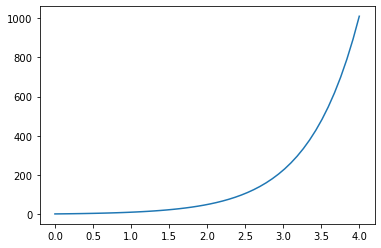

In [43]:
plt.plot(x, func(x, alpha[0], alpha[1]));